<Big>In classical computers, information is represented as the binary digits 0 or 1. These are called bits.In fact, every classical computer translates these bits into the human readable information on your electronic device.The word document you read or video you watch is encoded in the computer binary language in terms of these 1’s and 0’s.</Big>

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
from math import pi
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector
from IPython.core.display import Image, display # for web image to upload in jupyter

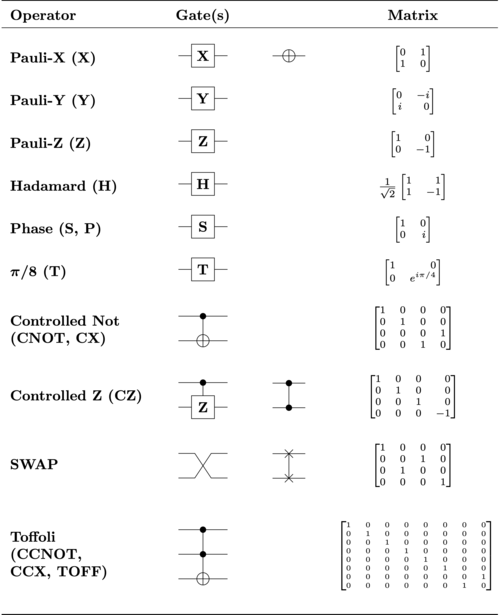

In [2]:
display(Image('https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Quantum_Logic_Gates.png/500px-Quantum_Logic_Gates.png', width=800, unconfined=True))

# <Big> <h1><center><span style="color: red;">$\textbf{Single qubits}$</center></h1> </Big>


<Big> $\textbf{Quantum bits}$, called qubits, are similar to bits in that there are two measurable states called
the 0 and 1 states. However, unlike classical bits, qubits can also be in a superposition state of these 0 and 1 states.

The state of a qubit is enclosed in the right half of an angled bracket,called the “ket”. A qubit |$\psi$>, could be in a |0> or |1> state which is a superposition of both |0> and |1>. This is written as 

$\begin{equation}|\Psi\rangle=\alpha|0\rangle+\beta|1\rangle\end{equation}$

where  $\alpha$ and $\beta$ are called the amplitudes of the states.

Amplitudes are very important because they tell us the probability of finding the particle in that
specific state when performing a measurement. The probability of measuring the particle in state
|0> is $\alpha^2$, and the probability of measuring the particle in state |1> is $\beta^2$. The matrix representation of qubits are 
\begin{equation}|0\rangle=\left[\begin{array}{l}
1 \\
0
\end{array}\right] \quad|1\rangle=\left[\begin{array}{l}
0 \\
1
\end{array}\right]\end{equation} </Big>

 ### <h1><center><span style="color: blue;"> $\textbf{1.Pauli X-gate}$</center></h1>

<Big>The $\mathrm{X}$ gate has the matrix
$$
\sigma_{x}=\left[\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right]
$$
and this is the Pauli X matrix, named after Wolfgang Pauli.
It has the property that
$$
\sigma_{x}|0\rangle=|1\rangle \quad \text { and } \quad \sigma_{x}|1\rangle=|0\rangle
$$
It "flips" between |0> and |1> . 
\begin{array}{l}
\text { For }|\psi\rangle=a|0\rangle+b|1\rangle \text { in } \mathbb{C}^{2}, \\
\qquad \mathbf{X}|\psi\rangle=b|0\rangle+a|1\rangle
\end{array}
The Pauli-X gate is a single qubit operation gate that is similar to the classical not gate. It takes a value and flips it to the opposite one. It maps |0＞ to |1＞ and |1＞ to |0</Big>

<Big>Here we assume the initialization to be Zero which is zero by default</Big>

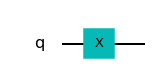

In [3]:
qcx= QuantumCircuit(1)
qcx.x(0)
qcx.draw('mpl')

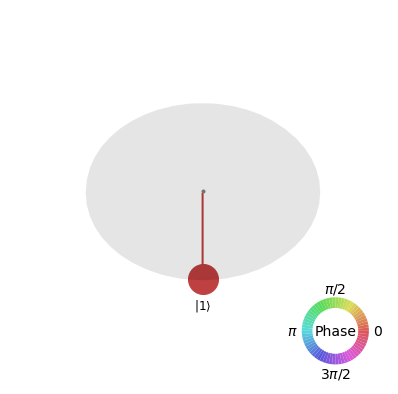

In [4]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(qcx)
plot_state_qsphere(new_sv.data)

<Big> Here we initialize the circuit to be ket one </Big>

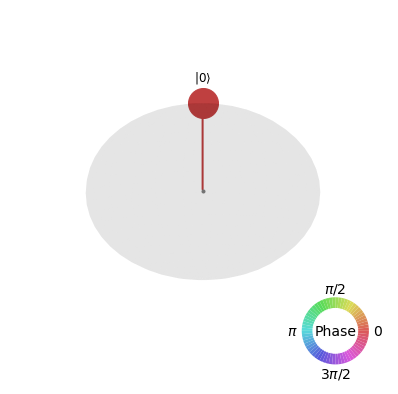

In [5]:
sv = Statevector.from_label('1')
new_sv = sv.evolve(qcx)
plot_state_qsphere(new_sv.data)


####  <h1><center><span style="color: blue;"> $\textbf{2.Pauli Y-gate}$</center></h1>

<Big>The Y gate has the matrix
$$
\sigma_{y}=\left[\begin{array}{cc}
0 & -i \\
i & 0
\end{array}\right]=i\left[\begin{array}{cc}
0 & -1 \\
1 & 0
\end{array}\right]
$$

and this is the Pauli Y matrix. 
The Pauli-Y gate is a single qubit operation. It maps |0＞ to -i|1＞ and |1＞ to i|0＞. It equates to a rotation around the Y-axis of the Bloch sphere by pi radians.</Big>


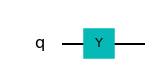

In [6]:
qcy = QuantumCircuit(1)
qcy.y(0)
qcy.draw('mpl')

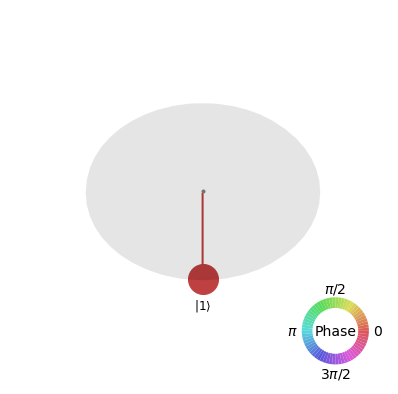

In [7]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(qcy)
plot_state_qsphere(new_sv.data)


<h1><center><span style="color: blue;"> $\textbf{3.Pauli Z-gate}$</center></h1>

<Big>The Z gate has the matrix
$$
\sigma_{z}=\left[\begin{array}{cc}
1 & 0 \\
0 & -1
\end{array}\right]
$$


and this is the Pauli Z matrix. It rotates qubit states by $\pi$ around the $z$ axis on the Bloch sphere.
 The Pauli-Z gate is a single qubit operation. It maps |1＞ to -|1＞ and it leaves |0＞ unchanged. It equates to a rotation around the Z-axis of the Bloch sphere by pi radians.</Big>

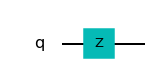

In [8]:
qcz = QuantumCircuit(1)
qcz.z(0)
qcz.draw('mpl')

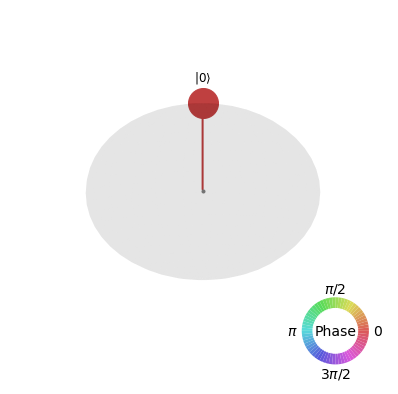

In [9]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(qcz)
plot_state_qsphere(new_sv.data)

<h1><center><span style="color: blue;"> $\textbf{4. Hadamard gate}$</center></h1>

<Big>The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of |0> and $|1> .$ It
has the matrix:
$$
H=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right]
$$
We can see that this performs the transformations below:
$$
\begin{array}{l}
H|0\rangle=|+\rangle \\
H|1\rangle=|-\rangle
\end{array} </Big>
$$
### Hadamard gates gives the output of superposition of both states with equal probablities

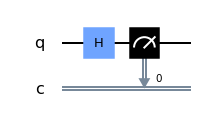

In [10]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw("mpl")

{'0': 499, '1': 501}


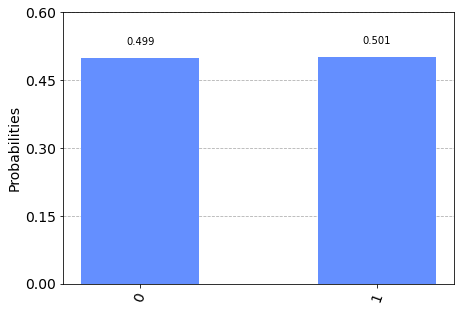

In [11]:
def run_circuit(qc2):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc, backend, shots = 1000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc)
print(counts)
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

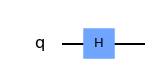

In [12]:
qch = QuantumCircuit(1)
qch.h(0)
qch.draw('mpl')

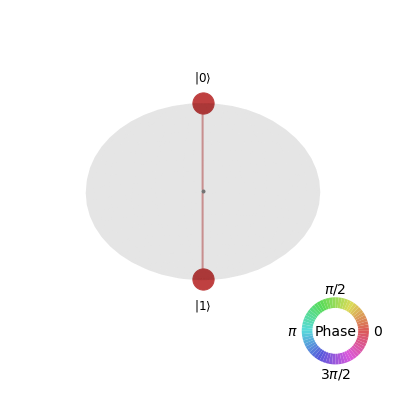

In [13]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(qch)
plot_state_qsphere(new_sv.data)

 We have the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$$ which is termed as ket plus state  as $$
\begin{array}{l}
H|0\rangle=|+\rangle
\end{array}
$$

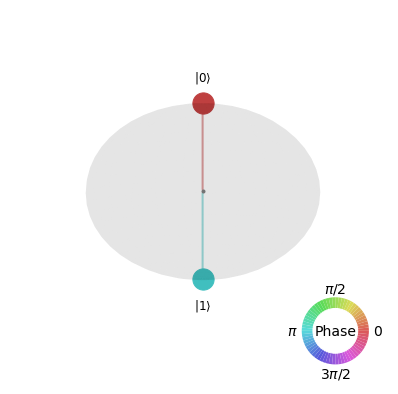

In [14]:
sv = Statevector.from_label('1')
new_sv = sv.evolve(qch)
plot_state_qsphere(new_sv.data)


<Big>This time, the bottom circle, corresponding to the basis state $\vert1\rangle$ has a different color corresponding to the phase of $\phi = \pi$. This is because the coefficient of $\vert1\rangle$ in the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ is $-1$, which is equal to $e^{i\pi}$. The given state is termed as ket minus as $$
\begin{array}{l}
H|1\rangle=|-\rangle
\end{array}
$$</Big>

<h1><center><span style="color: blue;"> $\textbf{5. S or P Gate}$</center></h1>

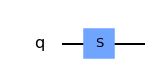

In [15]:
qcp = QuantumCircuit(1)
qcp.s(0)
qcp.draw('mpl')

In [16]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(qcp)
new_sv
#plot_state_qsphere(new_sv.data)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

In [17]:
sv = Statevector.from_label('1')
new_sv = sv.evolve(qcp)
plot_state_qsphere(new_sv.data)
new_sv

Statevector([0.+0.j, 0.+1.j],
            dims=(2,))

 Here P gate do nothing on ket zero but it changes phases by 90 degree on ket one 

<h1><center><span style="color: blue;"> $\textbf{6. T-gate}$</center></h1>

## The T-gate is a very commonly used gate, it is an Rϕ-gate with  ϕ=π/4 

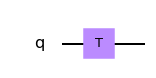

In [18]:
qct = QuantumCircuit(1)
qct.t(0)
qct.draw('mpl')

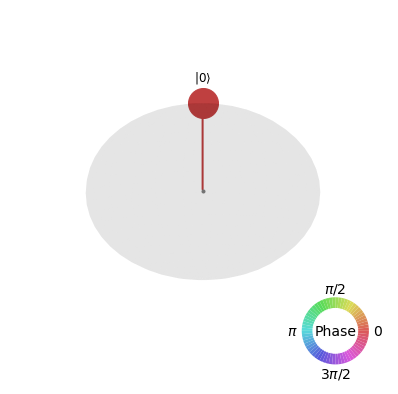

In [19]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(qct)
plot_state_qsphere(new_sv.data)

In [20]:
sv = Statevector.from_label('1')
new_sv = sv.evolve(qct)
new_sv
#plot_state_qsphere(new_sv.data)

Statevector([0.        +0.j        , 0.70710678+0.70710678j],
            dims=(2,))

<Big> <h1><center><span style="color: red;"> $\textbf{Multiqubit gates}$</center></h1></Big>

<h1><center><span style="color: Green;"> $\textbf{1.Controlled Gates}$</center></h1>

<Big>The controlled gate is a 2 or more qubit operation, where 1 or more qubits act as a control for some operation on a qubit. (eg: cx, cy, cz gates)</Big>

## 1(a) Controlled x gate


<Big>The controlled-x gate acts on 2 qubits and performs the NOT operation on the second qubit only when the first qubit is |1＞.</Big>

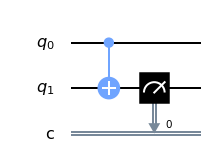

In [21]:
qccx=QuantumCircuit(2,1)
qccx.cx(0,1)
qccx.measure(1,0)
qccx.draw("mpl")

{'0': 1000}


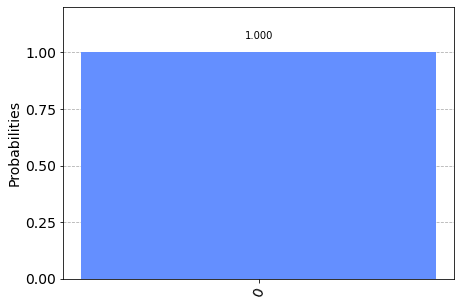

In [22]:
def run_circuit(qccx):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qccx, backend, shots = 1000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qccx)
print(counts)
plot_histogram(counts)

<Big> Here the probablity of second qubit which is zero is still zero when controlled is zero.</Big>

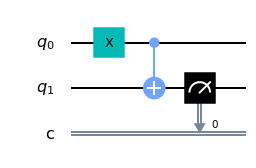

In [23]:
qccx=QuantumCircuit(2,1)
qccx.x(0)
qccx.cx(0,1)
qccx.measure(1,0)
qccx.draw("mpl")

#### Here in the above circuit we make first qubit  one applying X gate 

{'1': 1000}


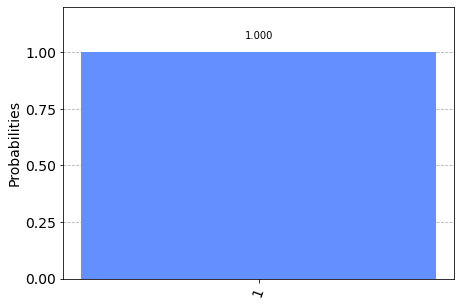

In [24]:
def run_circuit(qccx):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qccx, backend, shots = 1000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qccx)
print(counts)
plot_histogram(counts)

<Big> Here the  second qubit which is zero at first  has converted to 1 when controlled is one</Big>

## 1(b)                   Controlled y gate

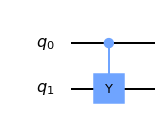

In [25]:
qccy=QuantumCircuit(2)
qccy.cy(0,1)
qccy.draw('mpl')

## 1(c) Controlled z gate

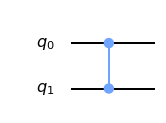

In [26]:
qccz=QuantumCircuit(2)
qccz.cz(0,1)
qccz.draw('mpl')

## 1(d)  Controlled  Not Gate

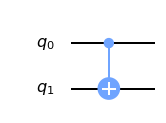

In [27]:
qccn=QuantumCircuit(2)
qccn.cnot(0,1)
qccn.draw('mpl')

<h1><center><span style="color: blue;"> $\textbf{2.SWAP Gate}$</center></h1>

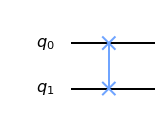

In [28]:
qcs=QuantumCircuit(2)
qcs.swap(0,1)
qcs.draw('mpl')


<h1><center><span style="color: blue;"> $\textbf{3.Toffili Gate or CCX Gate}$</center></h1>


<Big> It is also known as the "controlled-controlled-not" gate, which describes its action. It has 3-bit inputs and outputs; if the first two bits are both set to 1, it inverts the third bit, otherwise all bits stay the same.</Big>

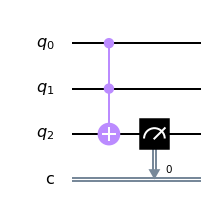

In [29]:
qc = QuantumCircuit(3,1)
qc.ccx(0,1,2)
qc.measure(2,0)
qc.draw('mpl')

{'0': 1000}


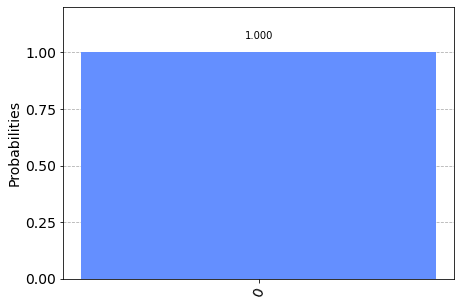

In [30]:
def run_circuit(qc):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc, backend, shots = 1000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc)
print(counts)
plot_histogram(counts)

<Big> since both quits 0 and 1 are at zero state so the output of qubit 2 is zero</Big>

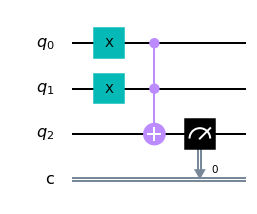

In [31]:
qc = QuantumCircuit(3,1)
qc.x(0)
qc.x(1)
qc.ccx(0,1,2)
qc.measure(2,0)
qc.draw('mpl')

<Big> Here we make the 0 and 1 qubits to 1 using bit flip gate i.e x gate</Big>

{'1': 1000}


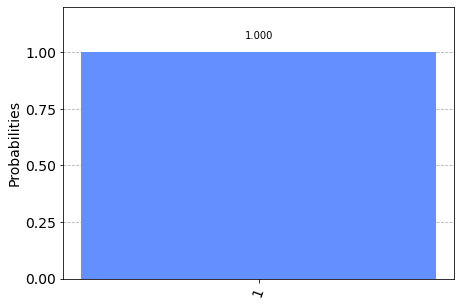

In [32]:
def run_circuit(qc):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc, backend, shots = 1000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc)
print(counts)
plot_histogram(counts)

<Big>Here, the output of qubits 2 is changed from the input(0) when both the qubits 0 and 1 is set to 1</Big>